In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

df = pd.read_csv('600 news with valid hoax label.csv', encoding='Windows-1252', sep=';')

df.head()

,berita,tagging
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid
3,Ikan lele merupakan salah satu makanan favorit...,Valid
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid


In [17]:
!pip install Sastrawi


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   berita   600 non-null    object
 1   tagging  600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


In [19]:
import string
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [20]:
data_clean = []
for opini in df["berita"]:
    def hapus_tanda(opini):
        tanda_baca = set(string.punctuation)
        opini = ''.join(ch for ch in opini if ch not in tanda_baca)
        return opini
    
    opini = opini.lower()
    opini = re.sub(r'\\u\w\w\w\w', '', opini)
    opini = re.sub(r'http\S+', '', opini)
    #hapus @username
    opini = re.sub('@[^\s]+','',opini)
    #hapus #tagger 
    opini = re.sub(r'#([^\s]+)', r'\1', opini)
    #hapus tanda baca
    opini = hapus_tanda(opini)
    #hapus angka dan angka yang berada dalam string 
    opini = re.sub(r'\w*\d\w*', '',opini).strip()

    #stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    opini = stemmer.stem(opini)
    data_clean.append(opini)

df['clean'] = data_clean

In [21]:
df.head()

,berita,tagging,clean
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,jakarta di jejaring sosial banyak edar informa...
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,isu bahwa ikan lele kandung sel kanker di jeja...
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,bagi nikmat kuliner dengan bahan dasar ikan le...
3,Ikan lele merupakan salah satu makanan favorit...,Valid,ikan lele rupa salah satu makan favorit di ind...
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,ikan lele rupa bahan makan yang cukup populer ...


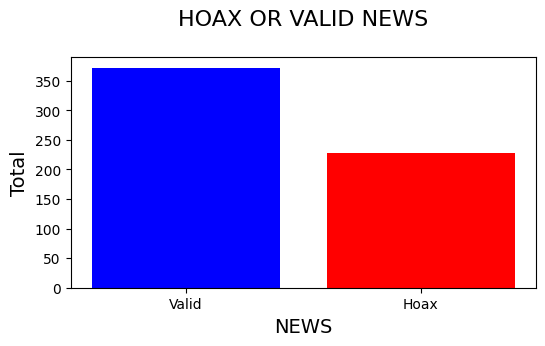

Jumlah data valid: 372
Jumlah data hoax: 228


In [7]:
import matplotlib.pyplot as plt

count = df["tagging"].value_counts()
plt.figure(figsize=(6, 3))
plt.bar(['Valid', 'Hoax'], count, color=['blue','red'])
plt.title('HOAX OR VALID NEWS\n', size=16)
plt.xlabel('NEWS', size=14)
plt.ylabel('Total', size=14)
plt.show()

# Menghitung counts untuk label valid
valid_counts = df[df['tagging'] == 'Valid'].shape[0]

# Menghitung counts untuk label hoax
hoax_counts = df[df['tagging'] == 'Hoax'].shape[0]

# Menampilkan hasil
print('Jumlah data valid:', valid_counts)
print('Jumlah data hoax:', hoax_counts)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [9]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
print(df["tagging"].unique(), "\n")

labelencoder = LabelEncoder()
df["tagging_Enc"] = labelencoder.fit_transform(df["tagging"])

print(df["tagging_Enc"].unique(), "\n")

print(df["tagging"][0])

['Valid' 'Hoax'] 

[1 0] 

Valid


## **BAG OF WORDS**

In [10]:
from tabulate import tabulate
# train_data = ['berita', 'tagging']
# test_data = ['berita']

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df.berita)
X_test = vectorizer.transform(df.clean)

y_train = df.tagging

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(y_pred)

acc = accuracy_score(y_train, clf.predict(X_train))
print('Training Accuracy : ', acc)
accuracy = accuracy_score(y_train, clf.predict(X_train))
precision = precision_score(y_train, clf.predict(X_train), average=None)
recall = recall_score(y_train, clf.predict(X_train), average=None)
f1 = f1_score(y_train, clf.predict(X_train), average=None)

table = [["Label", "Accuracy", "Precision", "Recall", "F1 Score"],
         ["Hoax", "", precision[0], recall[0], f1[0]],
         ["Valid", "", precision[1], recall[1], f1[1]],
         ["Total", accuracy, "", "", ""]]

print(tabulate(table, headers='firstrow'))

['Valid' 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Valid'
 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Hoax' 'Valid' 'Hoax' 'Hoax'
 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Hoax'
 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Valid' 'Hoax' 'Valid' 'Valid'
 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Hoax' 'Valid' 'Valid' 'Valid' 'Hoax' 'Hoax'
 'Hoax' 'Valid' 'Valid' 'Valid' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Valid'
 'Hoax' 'Valid' 'Valid' 'Hoax' 'Valid' 'Hoax' 'Hoax' 'Valid' 'Hoax' 'Hoax'
 'Hoax' 'Valid' 'Hoax' 'Valid' 'Valid' 'Valid' 'Hoax' 'Hoax' 'Valid'
 'Valid' 'Hoax' 'Hoax' 'Valid' 'Valid' 'Valid' 'Hoax' 'Valid' 'Hoax'
 'Hoax' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Hoax' 'Valid' 'Valid'
 'Valid' 'Hoax' 'Valid' 'Valid' 'Valid' 'Valid' 'Hoax' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Valid'
 'Valid' 'Valid' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'V

## **N-grams**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [12]:
ngram_range = (1, 2)
max_features = 1000

vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=max_features)
clf = MultinomialNB()

pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('clf', clf)
])

training_data = df.berita
training_labels = df.tagging

pipeline.fit(training_data, training_labels)

test_data = df.clean

predicted_labels = pipeline.predict(test_data)
print(predicted_labels)

accuracy = accuracy_score(training_labels, predicted_labels)
print(accuracy)

accuracy = accuracy_score(training_labels, predicted_labels)
precision = precision_score(training_labels, predicted_labels, average=None)
recall = recall_score(training_labels, predicted_labels, average=None)
f1 = f1_score(training_labels, predicted_labels, average=None)

table = [["Label", "Accuracy", "Precision", "Recall", "F1 Score"],
         ["Hoax", "", precision[0], recall[0], f1[0]],
         ["Valid", "", precision[1], recall[1], f1[1]],
         ["Total", accuracy, "", "", ""]]

print(tabulate(table, headers='firstrow'))

['Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax'
 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax'
 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax'
 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Hoax'
 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Hoax'
 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax'
 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax'
 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax'
 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Hoax' 'Hoax' 'Hoax' 'Hoax'
 'Hoax' 'Valid' 'Valid' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax'
 'Hoax' 'Valid' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Hoax' 'Hoax' 'Hoax'
 'Valid' 'Hoax' 'Hoax' 'Valid' 'Valid' 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Hoax'
 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Hoax' 'Hoax' 'Hoax' 'Hoax'
 'Valid' 'Hoax' 'Valid' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax

## **TFIDF**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [14]:
max_features = 1000

vectorizer = TfidfVectorizer(max_features=max_features)
clf = MultinomialNB()

pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('clf', clf)
])

training_data = df.berita
training_labels = df.tagging

pipeline.fit(training_data, training_labels)

test_data = df.clean

predicted_labels = pipeline.predict(test_data)
print(predicted_labels)

accuracy = accuracy_score(training_labels, predicted_labels)
print(accuracy)

accuracy = accuracy_score(training_labels, predicted_labels)
precision = precision_score(training_labels, predicted_labels, average=None)
recall = recall_score(training_labels, predicted_labels, average=None)
f1 = f1_score(training_labels, predicted_labels, average=None)

table = [["Label", "Accuracy", "Precision", "Recall", "F1 Score"],
         ["Hoax", "", precision[0], recall[0], f1[0]],
         ["Valid", "", precision[1], recall[1], f1[1]],
         ["Total", accuracy, "", "", ""]]

print(tabulate(table, headers='firstrow'))

['Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Hoax' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Hoax'
 'Valid' 'Valid' 'Valid' 'Valid' 'Hoax' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Hoax' 'Valid' 'Hoax' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Hoax'
 'Hoax' 'Hoax' 'Hoax' 'Hoax' 'Valid' 'Hoax' 'Valid' 'Valid' 'Hoax' 'Valid'
 'Hoax' 'Valid' 'Valid' 'Hoax' 'Hoax' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Hoax' 'Hoax' 'Valid'
 'Valid' 'Valid' 'Hoax' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Hoax' 'Valid' 'Valid' 'Valid' 'Valid' 'Vali

## **WORD 2 VEC**

In [10]:
!pip install gensim


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [101]:
embedding_dim = 100

training_data = df.berita
training_labels = df.tagging

tokenized_training_data = [sentence.split() for sentence in training_data]

model = Word2Vec(sentences=tokenized_training_data, vector_size=embedding_dim, window=5, min_count=1, workers=4)

test_data = df.clean
test_labels = df.tagging

tokenized_test_data = [sentence.split() for sentence in test_data]

# Get the embeddings for the training and test data
training_data_embeddings = []
for sentence in tokenized_training_data:
    embeddings = [model.wv[word] for word in sentence if word in model.wv]
    if embeddings:
        training_data_embeddings.append(sum(embeddings) / len(embeddings))
    else:
        training_data_embeddings.append([0] * embedding_dim)

test_data_embeddings = []
for sentence in tokenized_test_data:
    embeddings = [model.wv[word] for word in sentence if word in model.wv]
    if embeddings:
        test_data_embeddings.append(sum(embeddings) / len(embeddings))
    else:
        test_data_embeddings.append([0] * embedding_dim)

# Train a logistic regression classifier on top of the embeddings
classifier = LogisticRegression()
classifier.fit(training_data_embeddings, training_labels)

# Use the classifier to predict the labels for the test data
predicted_labels = classifier.predict(test_data_embeddings)

# Print the predicted labels and classification report for the test data
print(predicted_labels)
print(classification_report(test_labels, predicted_labels))

accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average=None)
recall = recall_score(test_labels, predicted_labels, average=None)
f1 = f1_score(test_labels, predicted_labels, average=None)

table = [["Label", "Accuracy", "Precision", "Recall", "F1 Score"],
         ["Hoax", "", precision[0], recall[0], f1[0]],
         ["Valid", "", precision[1], recall[1], f1[1]],
         ["Total", accuracy, "", "", ""]]

print(tabulate(table, headers='firstrow'))

['Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Hoax'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Hoax' 'Hoax'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Vali

## **FASTTEXT**

In [13]:
from gensim.models import FastText
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import os
from tqdm.auto import tqdm
from nltk.tokenize import word_tokenize

In [102]:
embedding_dim = 100

training_data = df.berita
training_labels = df.tagging

tokenized_training_data = [sentence.split() for sentence in training_data]

model = FastText(sentences=tokenized_training_data, vector_size=embedding_dim, window=5, min_count=1, workers=4)

test_data = df.clean
test_labels = df.tagging

tokenized_test_data = [sentence.split() for sentence in test_data]

# Get the embeddings for the training and test data
training_data_embeddings = []
for sentence in tokenized_training_data:
    embeddings = [model.wv[word] for word in sentence if word in model.wv]
    if embeddings:
        training_data_embeddings.append(sum(embeddings) / len(embeddings))
    else:
        training_data_embeddings.append([0] * embedding_dim)

test_data_embeddings = []
for sentence in tokenized_test_data:
    embeddings = [model.wv[word] for word in sentence if word in model.wv]
    if embeddings:
        test_data_embeddings.append(sum(embeddings) / len(embeddings))
    else:
        test_data_embeddings.append([0] * embedding_dim)

# Train a logistic regression classifier on top of the embeddings
classifier = LogisticRegression()
classifier.fit(training_data_embeddings, training_labels)

# Use the classifier to predict the labels for the test data
predicted_labels = classifier.predict(test_data_embeddings)

# Print the predicted labels and classification report for the test data
print(predicted_labels)
print(classification_report(test_labels, predicted_labels))

accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average=None)
recall = recall_score(test_labels, predicted_labels, average=None)
f1 = f1_score(test_labels, predicted_labels, average=None)

print(accuracy, precision, recall, f1)

# table = [["Label", "Accuracy", "Precision", "Recall", "F1 Score"],
#          ["Hoax", "", precision[0], recall[0], f1[0]],
#          ["Valid", "", precision[1], recall[1], f1[1]],
#          ["Total", accuracy, "", "", ""]]

# print(tabulate(table, headers='firstrow'))

['Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Hoax'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Hoax' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Hoax' 'Valid' 'Vali

## **FASTTEXT YANG LAINNYA**

In [15]:
from gensim.models import FastText
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import os
from tqdm.auto import tqdm
from nltk.tokenize import word_tokenize

In [16]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\DANNY
[nltk_data]     FERDIANSYAH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
sentences = [word_tokenize(berita.lower()) for berita in tqdm(df.berita)]
sentences[:5]

  0%|          | 0/600 [00:00<?, ?it/s]

[['jakarta',
  ',',
  'di',
  'jejaring',
  'sosial',
  ',',
  'banyak',
  'beredar',
  'informasi',
  'yang',
  'menyebut',
  'lele',
  'sebagai',
  'ikan',
  'paling',
  'jorok',
  '.',
  'dalam',
  'sesuap',
  'daging',
  'ikan',
  'lele',
  ',',
  'terkandung',
  '3000',
  'sel',
  'kanker',
  '.',
  'benarkah',
  '?',
  'julukan',
  'sebagai',
  'ikan',
  'paling',
  'jorok',
  'merujuk',
  'pada',
  'sifat',
  'lele',
  'yang',
  'doyan',
  'mengonsumsi',
  'segala',
  'jenis',
  'limbah',
  'di',
  'perairan',
  '.',
  'bahkan',
  'sebuah',
  'artikel',
  'yang',
  'cukup',
  'viral',
  'di',
  'internet',
  'menyebutkan',
  'kotoran',
  'manusia',
  'juga',
  'dijadikan',
  'pakan',
  'pada',
  'sebuah',
  'budidaya',
  'lele',
  'di',
  'kota',
  'haikou',
  ',',
  'china',
  '.',
  'sementara',
  'itu',
  'di',
  'habitat',
  'aslinya',
  ',',
  'lele',
  'atau',
  'catfish',
  'juga',
  'dikenal',
  'sebagai',
  'spesies',
  'ikan',
  'yang',
  'sangat',
  'tangguh',
  '.',


In [18]:
model = FastText(sentences, vector_size=128, window=5, min_count=3, workers=4, epochs=100, sg=0, hs=0)

In [19]:
os.makedirs("model/fasttext/", exist_ok=True)

In [20]:
model.save("model/fasttext/news_valid_hoax.fasttext")

In [21]:
model = FastText.load("model/fasttext/news_valid_hoax.fasttext")

In [22]:
contoh_data = [
    ['di', 'pasuruan', 'terdapat', 'banyak', 'kolam', 'lele'],
    ['di', 'pandaan', 'memiliki', 'kuburan', 'cina', 'dan', 'taiwan']
]

In [23]:
model.train(contoh_data, total_examples=len(contoh_data), epochs=1)

(7, 13)

In [24]:
model.save("model/fasttext/news_valid_hoax.fasttext")

*MODEL INFORMATION*

In [25]:
w2v = model.wv

In [26]:
w2v.index_to_key

[',',
 '.',
 'yang',
 'dan',
 'di',
 'dari',
 'ini',
 'itu',
 'tidak',
 'dengan',
 'tersebut',
 ')',
 '(',
 'dalam',
 'untuk',
 'ada',
 'pada',
 'lele',
 'juga',
 'atau',
 'ikan',
 "''",
 '``',
 'akan',
 'bahwa',
 'adalah',
 'karena',
 'bisa',
 'oleh',
 'saat',
 'indonesia',
 'pokemon',
 'seperti',
 'facebook',
 'bulu',
 'sikat',
 'babi',
 'jika',
 'ke',
 'stroke',
 'kata',
 'satu',
 'iphone',
 'media',
 'sudah',
 'presiden',
 'sebagai',
 'banyak',
 '”',
 'kita',
 'hal',
 'permen',
 'telah',
 'masjid',
 'mereka',
 'gigi',
 '6',
 'para',
 '“',
 'gaji',
 'aksi',
 'salah',
 'sosial',
 'beredar',
 'namun',
 'informasi',
 'reog',
 'menjadi',
 'mengandung',
 'melakukan',
 'merupakan',
 'orang',
 'beberapa',
 'lebih',
 'dapat',
 'tahanan',
 'tak',
 'kepada',
 'kuas',
 'kami',
 'bristle',
 'terjadi',
 'istiqlal',
 '?',
 'memang',
 'traveloka',
 'setelah',
 'kabar',
 'pihak',
 'menurut',
 'secara',
 'anda',
 'davao',
 'hanya',
 'jakarta',
 'harus',
 'kjri',
 'dilakukan',
 'tahun',
 'bahan',
 'b

In [27]:
w2v["lele"]

array([-0.8292914 ,  2.3614964 ,  4.715788  ,  0.17648007, -0.76660156,
       -3.5013368 , -2.2087142 , -0.05234961, -3.8218935 ,  2.683152  ,
        2.168044  ,  3.766492  , -3.559015  ,  0.7673437 ,  0.72222096,
        3.4554315 , -0.8057584 , -1.2694468 , -2.590399  , -2.4899714 ,
       -1.2467078 ,  1.3305048 , -1.6006061 , -0.7191222 , -0.99947554,
       -1.6202672 ,  2.7017334 ,  2.8979905 ,  0.3214034 , -2.3555813 ,
        0.854911  ,  2.2536147 ,  6.8776135 , -0.71093345,  2.624965  ,
        4.496678  , -4.4752536 , -2.4841783 , -2.6653123 , -1.8172684 ,
        0.9065912 , -1.3765239 , -1.3776304 ,  0.51170135,  0.03143928,
        3.9331117 , -2.6966796 , -0.48507106, -2.4490557 ,  1.8128811 ,
        3.1226563 ,  1.7012954 , -1.4307305 , -2.1913579 , -0.9213159 ,
        3.1301877 ,  2.1824396 ,  1.0980312 , -5.9235306 ,  3.0919647 ,
       -4.8848467 , -2.2989545 ,  2.0340688 , -4.39575   , -0.5993599 ,
       -1.4230964 ,  1.9531649 , -0.25985888, -0.49009016, -4.32

In [28]:
w2v.similar_by_word("orang", topn=5)

[('orang2', 0.9260941743850708),
 ('orang-orang', 0.9082040786743164),
 ('orangtua', 0.765986979007721),
 ('orangnya', 0.6984482407569885),
 ('seseorang', 0.6263843774795532)]

In [29]:
!pip install umap-learn


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
!pip install plotly


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from umap import UMAP
import numpy as np
import pandas as pd
import plotly.express as px

c:\Users\DANNY FERDIANSYAH\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\DANNY FERDIANSYAH\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\DANNY FERDIANSYAH\A

In [32]:
X = UMAP().fit_transform(w2v.vectors)

In [33]:
df = pd.DataFrame(X, columns=["umap1", "umap2"])
df["text"] = w2v.index_to_key

In [34]:
!pip install nbformat


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
fig = px.scatter(df, x="umap1", y="umap2", text="text")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=800,
    title_text='Reduced FastText Visualization'
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'umap1=%{x}<br>umap2=%{y}<br>text=%{text}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers+text',
              'name': '',
              'showlegend': False,
              'text': array([',', '.', 'yang', ..., 'mukai', 'bisa-bisa', 'lini'], dtype=object),
              'textposition': 'top center',
              'type': 'scattergl',
              'x': array([ 1.8420315 ,  1.3181705 , -0.07701325, ...,  0.8900747 ,  0.60539055,
                           1.9141096 ], dtype=float32),
              'xaxis': 'x',
              'y': array([-4.312513  ,  4.5779333 , -0.20087205, ..., -2.609216  , -1.9734044 ,
                          -2.5829122 ], dtype=float32),
              'yaxis': 'y'}],
    'layout': {'height': 800,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': 'Reduced FastText Visualization'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'umap1'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'umap2'}}}
})

## **BERT**

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['tagging'])

In [29]:
new_data = df.groupby('label').sample(300, random_state=42, replace=True)

In [30]:
sentences = new_data['clean'].values
labels = new_data['label'].values

In [31]:
label = pd.DataFrame(labels)
label.value_counts()

0    300
1    300
Name: count, dtype: int64

In [32]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

max_len = 0

# For every sentence...
for sent in sentences:
    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (1432 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  2722


In [33]:
import torch
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 100,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                    )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\DANNY FERDIANSYAH\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  sikat gigi adalah hal utama dalam hidup kita hari tidak ada sikat kita semua mungkin saja bakal alami mulut yang kurang enak atau tidak enak lebih dulu kita simak info ini untuk anda utama umat muslim supaya lebih cermat serta waspada dalam pilih sikat gigi lantar ada product bersih gigi yang pakai bahan dari yg tidak halal bila anda beli sikat gigi periksa kemas apabila ada tulis bristle pada paket jadi makna sikat gigi itu milik kandung bulu babi ingat ya bristle makna pig hair dengan kata lain bulu babi sekali lagi check kembali paket sikat gigi anda waktu beli jangan lupa serta berlarutlarut cemat belum serta waktu beli sikat gigi yang bakal anda pakai demikian pula pada kuas oles roti umum catat bristle pure bristle china bristle teman dekat tolongshare giat menggosokgosok gigi tentu kerja seharihari banyak bagai macam bentuk sikat gigi yang ada di supermarket atau pasar tradisional serta banyak juga juga bahan yang pakai dalam buat sikat gigi itu bagai umat muslim haru

In [34]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels.type(torch.LongTensor))

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

  540 training samples
   60 validation samples


In [35]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [36]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [37]:
optimizer = AdamW(model.parameters(),
                lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

c:\Users\DANNY FERDIANSYAH\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [38]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [39]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [40]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [41]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        output = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask, 
                            labels=b_labels)
        loss = output.loss
        logits = output.logits
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            output = model(b_input_ids, 
                                    token_type_ids=None, 
                                    attention_mask=b_input_mask,
                                    labels=b_labels)
            loss = output.loss
            logits = output.logits
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...

  Average training loss: 0.70
  Training epcoh took: 0:07:08

Running Validation...
  Accuracy: 0.58
  Validation Loss: 0.67
  Validation took: 0:00:15

======== Epoch 2 / 3 ========
Training...

  Average training loss: 0.65
  Training epcoh took: 0:06:32

Running Validation...
  Accuracy: 0.71
  Validation Loss: 0.64
  Validation took: 0:00:15

======== Epoch 3 / 3 ========
Training...

  Average training loss: 0.61
  Training epcoh took: 0:06:34

Running Validation...
  Accuracy: 0.75
  Validation Loss: 0.61
  Validation took: 0:00:15

Training complete!
Total training took 0:21:00 (h:mm:ss)


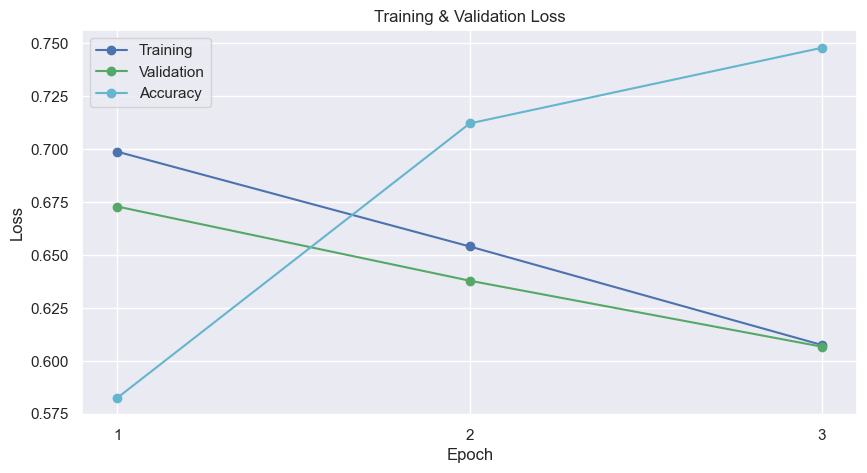

In [42]:
import matplotlib.pyplot as plt

import seaborn as sns

df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
plt.rcParams["figure.figsize"] = (10,5)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")
plt.plot(df_stats['Valid. Accur.'], 'c-o', label="Accuracy")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3])

plt.show()

## **GLOVE**

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [11]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
glove_embeddings = {}
with open('D:/KULI-AH/SEMESTER 6/PEMROSESAN BAHASA ALAMI/glove.6B.50d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

In [13]:
def document_vector(Text):
    vectors = [glove_embeddings[word] for word in Text.split() if word in glove_embeddings]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros_like(next(iter(glove_embeddings.values())))

# Convert the training data
train_vectors = np.vstack(train_data['clean'].apply(document_vector))

# Convert the testing data
test_vectors = np.vstack(test_data['clean'].apply(document_vector))

In [47]:
from sklearn.metrics import classification_report
from tabulate import tabulate
# Train a Logistic Regression model
classifier = LogisticRegression()
classifier.fit(train_vectors, train_data['tagging'])

# Predict the labels for the testing data
predicted_labels = classifier.predict(test_vectors)

# Extract the true labels
true_labels = test_data['tagging'].tolist()

# Print the predicted labels and classification report for the test data
print(predicted_labels)

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average=None)
recall = recall_score(true_labels, predicted_labels, average=None)
f1 = f1_score(true_labels, predicted_labels, average=None)

table = [["Label", "Accuracy", "Precision", "Recall", "F1 Score"],
         ["Hoax", "", precision[0], recall[0], f1[0]],
         ["Valid", "", precision[1], recall[1], f1[1]],
         ["Total", accuracy, "", "", ""]]

print(tabulate(table, headers='firstrow'))

['Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Hoax' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Hoax' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Hoax' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Hoax' 'Valid' 'Valid' 'Hoax' 'Valid' 'Valid' 'Valid' 'Valid'
 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Hoax' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid' 'Hoax'
 'Valid' 'Valid' 'Valid']
Label    Accuracy            Pre